In [1]:
from diff_viz import data_loading
from diff_viz import pca_plots
import pandas as pd

from sklearn.preprocessing import scale, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os import listdir, getcwd, chdir
from os.path import isfile, join
import numpy as np
from os import getcwd, chdir
import diff_predictor
from diff_predictor import data_process

In [2]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir"
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/nancelab/diff_visualizer/notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/nancelab/diff_visualizer


In [15]:
data_path = workbookDir+'/diff_viz/tests/testing_data/feature_data/'
filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'features_P' in f]
len(filelist) #Check to make sure there are the right number of files, in this case 15 - five per class

9

In [16]:
feature_list = [
    # 'alpha', # Fitted anomalous diffusion alpha exponenet
    # 'D_fit', # Fitted anomalous diffusion coefficient
    # 'kurtosis', # Kurtosis of track
    # 'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    # 'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    # 'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    # 'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    # 'elongation', # Est. of amount of extension of trajectory from centroid
    # 'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    # 'fractal_dim', # Measure of how complicated a self similar figure is
    # 'trappedness', # Probability that a particle with Deff is trapped in a region
    # 'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    # 'straightness', # Ratio of net displacement to the sum of squared step lengths
    # 'MSD_ratio', # MSD ratio of the track
    # 'Deff1', # Effective diffusion coefficient at 0.33 s
    # 'Deff2', # Effective diffusion coefficient at 3.3 s
    'Mean alpha', 
    'Mean D_fit', 
    'Mean kurtosis', 
    'Mean asymmetry1', 
    'Mean asymmetry2',
    'Mean asymmetry3', 
    'Mean AR',
    'Mean elongation', 
    'Mean boundedness',
    'Mean fractal_dim', 
    'Mean trappedness', 
    'Mean efficiency',
    'Mean straightness', 
    'Mean MSD_ratio', 
    'Mean Deff1', 
    'Mean Deff2',
    ]

In [17]:
fstats_tot = data_process.generate_fullstats(data_path, filelist, ['P14','P35', 'P70'], 'age')
fstats_tot.head()


Adding file features_P35_brain_2_slice_1_vid_2.csv size: (833, 91)
Adding file features_P35_brain_2_slice_1_vid_3.csv size: (1017, 91)
Adding file features_P70_40nm_s1_v1.csv size: (27, 67)
Adding file features_P14_40nm_s1_v1.csv size: (793, 91)
Adding file features_P14_40nm_s1_v3.csv size: (519, 91)
Adding file features_P70_40nm_s1_v3.csv size: (25, 67)
Adding file features_P35_brain_2_slice_1_vid_1.csv size: (416, 91)
Adding file features_P70_40nm_s1_v2.csv size: (12, 67)


/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-packages/diff_predictor/data_process.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fstats_tot = fstats_tot.append(fstats, ignore_index=True)
/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-packages/diff_predictor/data_process.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fstats_tot = fstats_tot.append(fstats, ignore_index=True)
/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-packages/diff_predictor/data_process.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fstats_tot = fstats_tot.append(fstats, ignore_index=True)
/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-p

Adding file features_P14_40nm_s1_v2.csv size: (1356, 91)


/Users/nelsschimek/anaconda3/envs/streamlit_diff_viz/lib/python3.9/site-packages/diff_predictor/data_process.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fstats_tot = fstats_tot.append(fstats, ignore_index=True)


,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,...,Std convex_hull_norm,Mean dist_tot,Std dist_tot,Mean dist_net,Std dist_net,Mean progression,Std progression,age,Filename,Video Number
0,0.0,0.106413,154.895550,2.467524,0.859297,0.194659,0.257757,1.665794,0.399686,0.025158,...,0.0,42045.776355,33800.899245,1752.684607,26.147710,0.063506,0.034115,P35,features_P35_brain_2_slice_1_vid_2.csv,0
1,1.0,2.366901,0.989900,3.942972,0.935786,0.128804,0.353575,3.311093,0.697985,0.039997,...,0.0,42045.776355,33800.899245,1752.684607,26.147710,0.063506,0.034115,P35,features_P35_brain_2_slice_1_vid_2.csv,0
2,2.0,0.137253,0.452997,3.177774,0.459519,0.438157,0.079380,1.166859,0.142998,0.076520,...,0.0,69636.966796,121310.940638,1936.511441,76.612045,0.066462,0.031356,P35,features_P35_brain_2_slice_1_vid_2.csv,0
3,3.0,1.595833,0.283212,3.195159,0.823537,0.220224,0.228392,2.118286,0.527920,0.079901,...,0.0,45550.531028,33002.065769,2049.658427,36.720240,0.068563,0.036162,P35,features_P35_brain_2_slice_1_vid_2.csv,0
4,4.0,0.123190,22.738170,2.043446,0.887906,0.172376,0.286581,1.686013,0.406885,0.245254,...,0.0,68092.721074,48783.784822,2563.695145,43.494116,0.057964,0.034633,P35,features_P35_brain_2_slice_1_vid_2.csv,0


In [18]:
ecm = fstats_tot[feature_list + ['age']]
ecm = ecm[~ecm[list(set(feature_list) - set(['Deff2', 'Mean Deff2']))].isin([np.nan, np.inf, -np.inf]).any(1)]       # Removing nan and inf data points
ecm = ecm.fillna(0) #setting any Deff2 values that are NA to 0
ecm.shape

/var/folders/x0/30gk1h9n3fqfnt97pwz4bw380000gn/T/ipykernel_5100/1249979116.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  ecm = ecm[~ecm[list(set(feature_list) - set(['Deff2', 'Mean Deff2']))].isin([np.nan, np.inf, -np.inf]).any(1)]       # Removing nan and inf data points


(4837, 17)

In [19]:
labels = np.array(ecm['age'])
features_df = ecm.drop(['age'], axis=1) #We dont want the target column in the data that undergoes PCA
#col_names = features_df.columns

In [20]:
scaler = StandardScaler() #creater the standard scaler object
scaled_df = scaler.fit_transform(features_df) # Scale the feature data
scaled_df = pd.DataFrame(scaled_df, columns=feature_list) # the fit function returns an array, so we can convert i

In [21]:
pca = PCA(n_components=10).fit(scaled_df) # Reduce the number of features down to 10 columns - this number is variable
print(pca.explained_variance_ratio_.sum()) # This prints what percentage of the variance is captured by the n_comp

0.9697845445346154


In [22]:
pca_embeddings = pca.transform(scaled_df)
pca_embeddings_df = pd.DataFrame(pca_embeddings[:, :2], columns=['Component 1', 'Component 2'])
pca_embeddings_df['target'] = labels

In [23]:
pca_embeddings[:,0:2][:,0][labels == 'P14']

array([-1.7292176 ,  5.21840144,  3.24272447, ..., -4.04748999,
       -2.40569685, -4.04748999])

P14
P35
P70


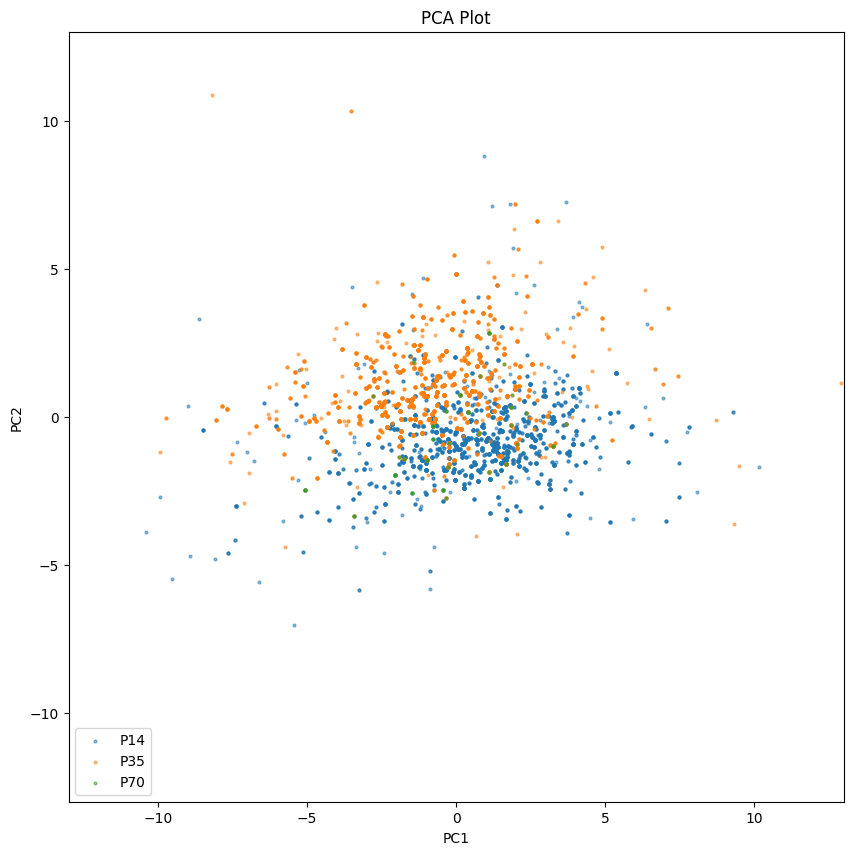

In [24]:
fig = pca_plots.pca_plot(ecm, 2, 'age')

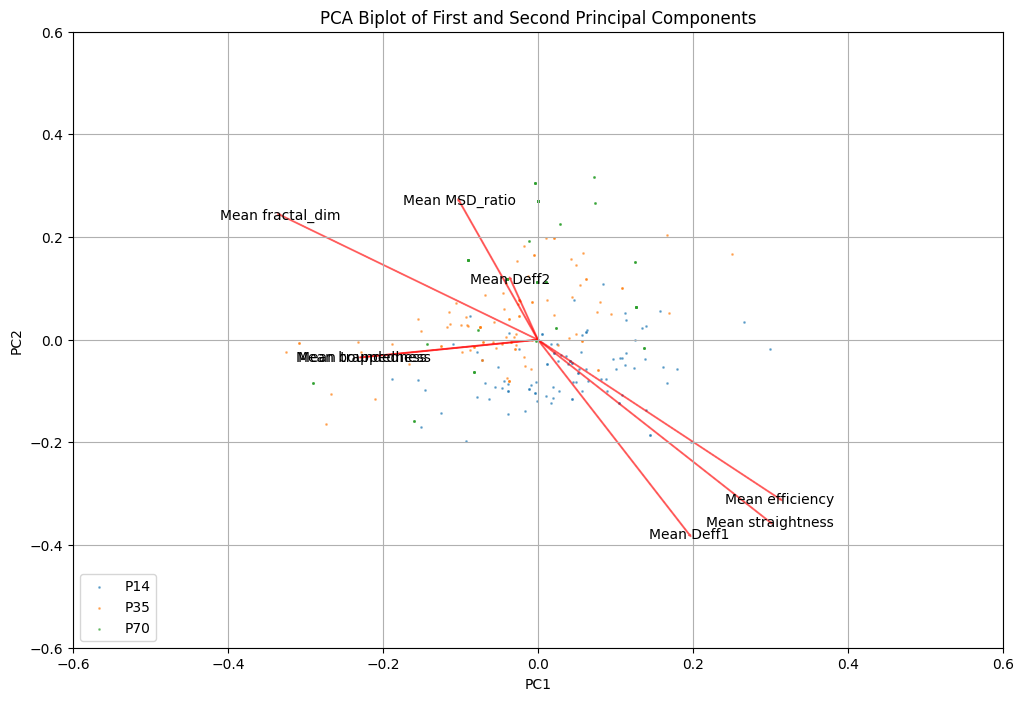

In [25]:
fig = pca_plots.plot_pca_bi_plot(ecm, n_components=2, features=feature_list, target_col='age', num_points=100)

In [30]:
len(fig.axes[1].collections)

IndexError: list index out of range